In [1]:
# 基础库 Basic Libraries
import os
import sys
import copy
import pickle
import warnings
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import base  # 自定义模块 base.py

# 忽略警告 Suppress Warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 中文字体设置 Chinese Font Setting
from matplotlib.font_manager import FontProperties
font_ch = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)
font_en = FontProperties(fname=r"c:\windows\fonts\times.ttf", size=12)

# 机器学习库 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel

# 优化算法 Optimization Libraries
from skopt import gp_minimize
from scipy.optimize import minimize, NonlinearConstraint

# 深度学习 Deep Learning
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim

# 其他
from collections import deque


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
# 读取Excel文件
excel_path = f'C:\\Users\\Admin\\Documents\\GitHub\\gaolu\\MPC\\高炉\\0数据处理\\新输入输出模式\\1h_mean.xlsx'
df_sheet_yuansu = pd.read_excel(excel_path, sheet_name='原始输出') 
# df_sheet_yuansu = pd.read_excel(excel_path, sheet_name='剔除直线输出') 
# df_sheet_yuansu = pd.read_excel(excel_path, sheet_name='单SI_0.2_0.8') 
# print(df_sheet_yuansu.info())
# print(df_sheet_yuansu.columns)

excel_path = f'C:\\Users\\Admin\\Documents\\GitHub\\gaolu\\MPC\\高炉\\0数据处理\\新输入输出模式\\1h_mean.xlsx'
df_sheet_params = pd.read_excel(excel_path, sheet_name='1h_mean_all') 

# print(df_sheet_params.info())
# print(df_sheet_params.columns)


In [3]:
import pandas as pd

# 假设 df 是你的 DataFrame

# 检查 DataFrame 中是否包含 NaN 值
contains_nan = df_sheet_yuansu.isna().any().any()

if contains_nan:
    print("数据包含 NaN 值")
else:
    print("数据不包含 NaN 值")
    # 检查 DataFrame 中是否包含 NaN 值
contains_nan = df_sheet_params.isna().any().any()

if contains_nan:
    print("数据包含 NaN 值")
else:
    print("数据不包含 NaN 值")


数据不包含 NaN 值
数据不包含 NaN 值


In [4]:
input_term =        ['富氧流量', '冷风流量', '热风压力', '热风温度']

output_term = ['铁水温度[MIT]', '铁水硅含量[SI]']
time_term= '时间戳h'


C:\Users\Admin\AppData\Local\Temp\ipykernel_19368\3220100934.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[idx] = interpolated_value
C:\Users\Admin\AppData\Local\Temp\ipykernel_19368\3220100934.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[idx] = interpolated_value
C:\Users\Admin\AppData\Local\Temp\ipykernel_19368\3220100934.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[idx] = interpolated_value
C:\Users\Admi

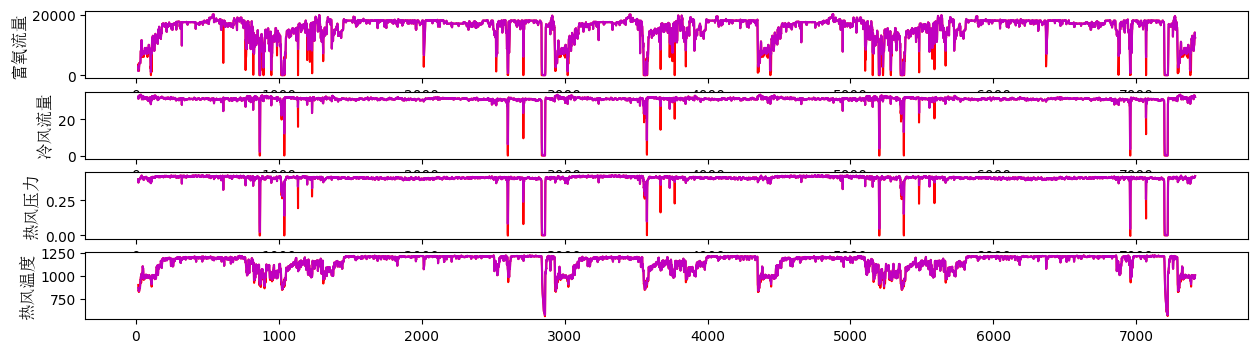

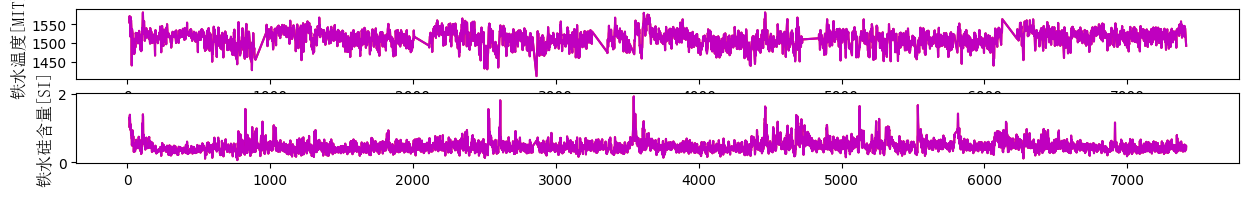

In [5]:
# 异常数据处理-处理前后对比
# 创建数据框副本以避免修改原始数据
df_sheet_yuansu_process = df_sheet_yuansu.copy()
df_sheet_params_process = df_sheet_params.copy()
# 定义一个函数，用前后两个值的差值按照距离进行加权替换异常值
def replace_outliers_with_weighted_diff(x, y):
    # 计算列的中位数
    median_value = y.median()
    # 检测异常值的索引
    outliers_index = (y - median_value).abs() > 2.5 * y.std()
    
    # 遍历异常值的索引
    for idx in outliers_index[outliers_index].index:
        # 获取异常值前一个和后一个值的索引
        prev_idx = idx - 1 if idx - 1 >= 0 else idx
        next_idx = idx + 1 if idx + 1 < len(y) else idx
        # 计算当前 x 与前后两个 x 的距离
        dist_prev = abs(x[idx] - x[prev_idx])
        dist_next = abs(x[next_idx] - x[idx])
        total_dist = dist_prev + dist_next
        # 计算权重
        weight_prev = dist_next / total_dist
        weight_next = dist_prev / total_dist
        # 计算前后两个值的差值
        diff = y[next_idx] - y[prev_idx]
        # 根据权重进行插值
        interpolated_value = y[prev_idx] + weight_prev * diff
        # 用插值结果替代异常值
        y[idx] = interpolated_value

# 画出数据
def plot_subplot(data_x,data_y_yuan,data_y,column):
    plt.plot(data_x,data_y_yuan,'r-')
    plt.plot(data_x,data_y,'m-')
    # plt.xlabel(time_term, fontproperties=font_ch)  # 使用中文标签
    plt.ylabel(column, fontproperties=font_ch)  # 使用中文标签
    # 使用中文标签


# 对指定列应用替代异常值的函数
# 对指定列应用替代异常值的函数
replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[0]])
replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[1]])
replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[2]])
replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[3]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[4]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[5]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[6]])

# replace_outliers_with_weighted_diff(df_sheet_yuansu_process[time_term], df_sheet_yuansu_process[output_term[0]])
# replace_outliers_with_weighted_diff(df_sheet_yuansu_process[time_term], df_sheet_yuansu_process[output_term[1]])

plt.figure(figsize=(15, 4))
for idx, column in enumerate(input_term):
    plt.subplot(len(input_term), 1, idx+1)
    plot_subplot(df_sheet_params_process[time_term].values,df_sheet_params[column].values,df_sheet_params_process[column].values,column)

plt.figure(figsize=(15, 2))
for idx, column in enumerate(output_term):
    plt.subplot(len(output_term), 1, idx+1)
    plot_subplot(df_sheet_yuansu_process[time_term].values,df_sheet_yuansu[column].values,df_sheet_yuansu_process[column].values,column)




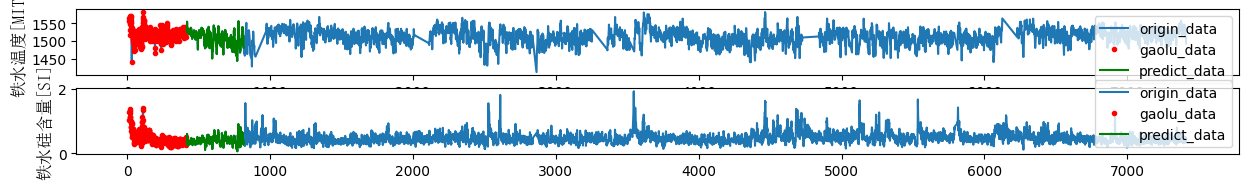

In [6]:
# 画出选取的数据
def plot_subplot(data_x,data_y,column,index_predict,index_gaolu):
    plt.plot(data_x,data_y,'-', label='origin_data')
    plt.plot(data_x[index_gaolu],data_y[index_gaolu],'r.', label='gaolu_data')
    plt.plot(data_x[index_predict],data_y[index_predict],'g-', label='predict_data')
    plt.legend()
    # plt.xlabel(time_term, fontproperties=font_ch)  # 使用中文标签
    plt.ylabel(column, fontproperties=font_ch)  # 使用中文标签



length1 = 400
start1 = 0
length2 = 400
start2 = 400


index_gaolu   = range(start1, start1+length1+1, 1)
index_predict     = range(start2, start2+length2+1, 1)
# index = range(1, 7572, 1)


plt.figure(figsize=(15, 6))
for idx, column in enumerate(output_term):
    plt.subplot(len(input_term+output_term), 1, idx+1)
    plot_subplot(df_sheet_yuansu_process[time_term].values,df_sheet_yuansu_process[column].values,column,index_predict,index_gaolu)


In [7]:
# 数据归一化、逆归一化
from sklearn.preprocessing import MinMaxScaler

# 将数据存储为字典，每个键对应一列数据
original_data_dict = {
    input_term[0]:   df_sheet_params_process[input_term[0]].values,
    input_term[1]:   df_sheet_params_process[input_term[1]].values,
    input_term[2]:   df_sheet_params_process[input_term[2]].values,
    input_term[3]:   df_sheet_params_process[input_term[3]].values,
    # input_term[4]:   df_sheet_params_process[input_term[4]].values,
    # input_term[5]:   df_sheet_params_process[input_term[5]].values,
    # input_term[6]:   df_sheet_params_process[input_term[6]].values,
    output_term[0]:  df_sheet_yuansu_process[output_term[0]].values,
    output_term[1]:  df_sheet_yuansu_process[output_term[1]].values
}

# 初始化缩放器
scalers = {}

# 进行拟合
for column, data in original_data_dict.items():
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data.reshape(-1, 1))  # 保证数据是列向量
    scalers[column] = scaler

# 进行归一化
normalized_data_dict = {}
for column, scaler in scalers.items():
    normalized_data_dict[column] = scaler.transform(original_data_dict[column].reshape(-1, 1)).flatten()

# 进行反归一化
original_data_dict = {}
for column, scaler in scalers.items():
    original_data_dict[column] = scaler.inverse_transform(normalized_data_dict[column].reshape(-1, 1)).flatten()


In [8]:
# 标定归一化前后数据
data_point = np.array([1500]).reshape(-1, 1)
data1 = scalers[output_term[0]].transform(data_point).flatten()

data_point = np.array(data1).reshape(-1, 1)
data2 = scalers[output_term[0]].inverse_transform(data_point).flatten()

data_point = np.array([1510]).reshape(-1, 1)
data3 = scalers[output_term[0]].transform(data_point).flatten()

data_point = np.array(data3).reshape(-1, 1)
data4 = scalers[output_term[0]].inverse_transform(data_point).flatten()

print(data1)
print(data2)
print(data3)
print(data4)
d_temp = (data3-data1)/(data4-data2)
print('每摄氏度的输出差：',d_temp)



data_point = np.array([0.50]).reshape(-1, 1)
data1 = scalers[output_term[1]].transform(data_point).flatten()

data_point = np.array(data1).reshape(-1, 1)
data2 = scalers[output_term[1]].inverse_transform(data_point).flatten()

data_point = np.array([0.60]).reshape(-1, 1)
data3 = scalers[output_term[1]].transform(data_point).flatten()

data_point = np.array(data3).reshape(-1, 1)
data4 = scalers[output_term[1]].inverse_transform(data_point).flatten()

print(data1)
print(data2)
print(data3)
print(data4)
d_yuansu = (data3-data1)/(data4-data2)
print('每浓度的输出差：',(data3-data1))


[0.0341569]
[1500.]
[0.1523575]
[1510.]
每摄氏度的输出差： [0.01182006]
[-0.53242879]
[0.5]
[-0.4247456]
[0.6]
每浓度的输出差： [0.1076832]


In [9]:
isShuffle = True
isShuffle = False
time_steps = 2
test_size = 0.15
val_size = 0.15
train_size = 1-val_size-test_size


In [10]:
# 组合训练数据--拆分训练、测试集

# 定义时间步数和特征数

# 构成    
# X = [X(t),X(t-1),Y(t-1)]
# Y = [Y(t)]
def make_data(u1_data,u2_data,u3_data,u4_data,y1_data,y2_data,index_fanwei):
    X = np.column_stack((u1_data,u2_data,u3_data,u4_data))
    y = np.column_stack((y1_data, y2_data))

    X_modified = []
    y_modified = []
    
    for i in range(3,len(y1_data)):
        if i in index_fanwei:
            # print(i)
            # print(df_sheet_yuansu[time_term][i])
            yuansu_time = df_sheet_yuansu[time_term][i]
            closest_10 = df_sheet_params[df_sheet_params[time_term] <= yuansu_time].nlargest(time_steps, time_term)
            # print(closest_10)
            
            index = closest_10.index
            # print(index)
            # print(closest_10.iloc[-1][time_term])
            if closest_10.iloc[-1][time_term] < yuansu_time - time_steps + 1:
                print(i,yuansu_time,'errloss')
            else:

                # print(X[index, :])
                new_x_sample = np.concatenate([X[i, :] for i in index],axis=0)
                # print(new_x_sample)
                y_last = y[i-1, :]
                # print(y_last, 'y_last time : ',df_sheet_yuansu[time_term][i-1])
                new_x_sample = np.concatenate([new_x_sample,y_last],axis=0)
                # print(new_x_sample)
                y_sample = y[i, :]  
                X_modified.append(new_x_sample)
                y_modified.append(y_sample)
                print(i,yuansu_time,index[0],index[-1], end='\r')
                # break

    # 将列表转换为 NumPy 数组
    X_modified = np.array(X_modified)
    y_modified = np.array(y_modified)
    X_reshaped = X_modified.reshape((X_modified.shape[0], X_modified.shape[1]))

    # 打印新数据的形状
    print("Modified Input Shape:", X_reshaped.shape)
    print("Modified Output Shape:", y_modified.shape)


    X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_modified, 
                                                        test_size=test_size, 
                                                        random_state=42, 
                                                        shuffle=isShuffle)

    # 将剩余的70%训练数据再次拆分成训练数据和验证数据（20%验证数据，50%训练数据）
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                        test_size=val_size/(train_size+val_size), 
                                                        random_state=42, 
                                                        shuffle=isShuffle)

    print('训练数量：',X_train.shape,y_train.shape)
    print('验证数量：',X_val.shape,y_val.shape)
    print('测试数量：',X_test.shape,y_test.shape)

    return X_train, X_val, X_test, y_train, y_val, y_test


In [11]:
def symmetrical_moving_average(data, N):
    """
    使用对称的移动平均滤波，当前值由其自身及其前后的值决定。
    
    :param data: 输入的数据序列，一般为列表或者NumPy数组。
    :return: 经过滤波处理的数据序列。
    """
    filtered_data = []
    N = 9
    percent = 0.8
    # 遍历数据，从索引1开始到倒数第二个元素结束
    for i in range(1, len(data) - 1):
        # 计算当前值及其前后值的平均
        average = (data[i - 1]*(1-percent)/2 + data[i]*percent + data[i + 1]*(1-percent)/2)
        filtered_data.append(average)
    
    # 对于序列的第一个和最后一个元素，直接使用原始值
    # 或者可以使用其他边界处理策略
    filtered_data.insert(0, data[0])
    filtered_data.append(data[-1])
    
    return np.array(filtered_data)

# 示例数据
data = [2, 4, 6, 8, 10, 12, 14]
filtered_data = symmetrical_moving_average(data,9)
print(filtered_data)




[ 2.  4.  6.  8. 10. 12. 14.]


In [12]:
# 高炉模型列数据
u1_data = normalized_data_dict[input_term[0]]
u2_data = normalized_data_dict[input_term[1]]
u3_data = normalized_data_dict[input_term[2]]
u4_data = normalized_data_dict[input_term[3]]
y1_data = normalized_data_dict[output_term[0]]
y2_data = normalized_data_dict[output_term[1]]
num_samples = y2_data.shape[0]

# filter_windows = 2
# u1_data = symmetrical_moving_average(u1_data, filter_windows)
# u2_data = symmetrical_moving_average(u2_data, filter_windows)
# u3_data = symmetrical_moving_average(u3_data, filter_windows)
# u4_data = symmetrical_moving_average(u4_data, filter_windows)
# u5_data = symmetrical_moving_average(u5_data, filter_windows)
# u6_data = symmetrical_moving_average(u6_data, filter_windows)
# u7_data = symmetrical_moving_average(u7_data, filter_windows)
# y1_data = symmetrical_moving_average(y1_data, filter_windows)
# y2_data = symmetrical_moving_average(y2_data, filter_windows)

print('高炉模型数据')
X_gaolu_train, X_gaolu_val, X_gaolu_test,\
y_gaolu_train, y_gaolu_val, y_gaolu_test = make_data(u1_data,u2_data,u3_data,u4_data,
                                                            y1_data,y2_data,
                                                            index_fanwei=index_gaolu)



# 预测模型列数据
u1_data = normalized_data_dict[input_term[0]]
u2_data = normalized_data_dict[input_term[1]]
u3_data = normalized_data_dict[input_term[2]]
u4_data = normalized_data_dict[input_term[3]]
y1_data = normalized_data_dict[output_term[0]]
y2_data = normalized_data_dict[output_term[1]]
num_samples = y2_data.shape[0]

# filter_windows = 2
# u1_data = symmetrical_moving_average(u1_data, filter_windows)
# u2_data = symmetrical_moving_average(u2_data, filter_windows)
# u3_data = symmetrical_moving_average(u3_data, filter_windows)
# u4_data = symmetrical_moving_average(u4_data, filter_windows)
# u5_data = symmetrical_moving_average(u5_data, filter_windows)
# u6_data = symmetrical_moving_average(u6_data, filter_windows)
# u7_data = symmetrical_moving_average(u7_data, filter_windows)
# y1_data = symmetrical_moving_average(y1_data, filter_windows)
# y2_data = symmetrical_moving_average(y2_data, filter_windows)
print('预测模型数据')
X_predict_train, X_predict_val, X_predict_test,\
y_predict_train, y_predict_val, y_predict_test = make_data(u1_data,u2_data,u3_data,u4_data,
                                                            y1_data,y2_data,
                                                            index_fanwei=index_predict)



高炉模型数据
Modified Input Shape: (398, 10)
Modified Output Shape: (398, 2)
训练数量： (278, 10) (278, 2)
验证数量： (60, 10) (60, 2)
测试数量： (60, 10) (60, 2)
预测模型数据
Modified Input Shape: (401, 10)
Modified Output Shape: (401, 2)
训练数量： (279, 10) (279, 2)
验证数量： (61, 10) (61, 2)
测试数量： (61, 10) (61, 2)


In [13]:
epoch_once_time = 50
ischuangxin = True
# ischuangxin = False
cengshu = 3


In [14]:
# 定义模型
import torch
import torch.nn as nn
import torch.optim as optim

class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, if_chuangxin = False,gamma = 0.1):
        self.if_chuangxin = if_chuangxin
        super(MyNeuralNetwork, self).__init__()
        if cengshu == 3:    
            if self.if_chuangxin:            
                self.fc1 = nn.Linear(input_size, hidden_size)
                self.relu = nn.ReLU()
                self.fc2 = nn.Linear(hidden_size, hidden_size)
                self.fc3 = nn.Linear(hidden_size, hidden_size)
                self.fc4 = nn.Linear(hidden_size, output_size)
            else:
                self.fc1 = nn.Linear(input_size, hidden_size)
                self.fc2 = nn.Linear(hidden_size, hidden_size)
                self.fc3 = nn.Linear(hidden_size, hidden_size)
                self.fc4 = nn.Linear(hidden_size, output_size)
                self.relu = nn.ReLU()
        elif cengshu == 2:  
            if self.if_chuangxin:            
                self.fc1 = nn.Linear(input_size, hidden_size)
                self.relu = nn.ReLU()
                self.fc2 = nn.Linear(hidden_size, hidden_size)
                self.fc3 = nn.Linear(hidden_size, output_size)
            else:
                self.fc1 = nn.Linear(input_size, hidden_size)
                self.fc2 = nn.Linear(hidden_size, hidden_size)
                self.fc3 = nn.Linear(hidden_size, output_size)
                self.relu = nn.ReLU()


    def forward(self, x0):
        if cengshu == 3:    
            if self.if_chuangxin:

                x = self.fc1(x0)
                x = self.relu(x)

                x2 = self.fc2(x)
                x2 = self.relu(x2)

                x3 = self.fc3(x2)
                x3 = self.relu(x3)

                x4 = x + x2 + x3
                output = self.fc4(x4)
            else:
                x = self.fc1(x0)
                x = self.relu(x)

                x2 = self.fc2(x)
                x2 = self.relu(x2)

                x3 = self.fc3(x2)
                x3 = self.relu(x3)

                output = self.fc4(x3)
        elif cengshu == 2:  
            if self.if_chuangxin:

                x = self.fc1(x0)
                x = self.relu(x)

                x2 = self.fc2(x)
                x2 = self.relu(x2)

                x3 = x + x2
                output = self.fc3(x3)
            else:
                x = self.fc1(x0)
                x = self.relu(x)

                x2 = self.fc2(x)
                x2 = self.relu(x2)

                output = self.fc3(x2)
        return output
        
        return output
    
    

    
    def custom_loss(self, y_true, y_pred):

        squared_diff = torch.pow(y_true - y_pred, 2)
        sum_squared_diff = torch.sum(squared_diff)
        mse = sum_squared_diff / len(y_true)
        return mse
    

    def my_fit(self, 
                X_train, y_train, 
                X_val, y_val, 
                train_loss_list,val_loss_list,
                epochs=1, batch_size=32, lr=0.001):
        optimizer = optim.Adam(self.parameters(), lr=lr)


        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(0, len(X_train), batch_size):
                x_batch = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
                y_batch = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)

                optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = self.custom_loss(y_batch, y_pred)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

            average_epoch_train_loss = epoch_loss / (len(X_train) / batch_size)
            # 验证集评估
            self.eval()
            with torch.no_grad():
                val_loss = 0
                for i in range(0, len(X_val), batch_size):
                    x_batch_val = torch.tensor(X_val[i:i+batch_size], dtype=torch.float32)
                    y_batch_val = torch.tensor(y_val[i:i+batch_size], dtype=torch.float32)

                    y_pred_val = self(x_batch_val)
                    val_loss += self.custom_loss(y_batch_val, y_pred_val).item()

                average_epoch_val_loss = val_loss / (len(X_val) / batch_size)

            print(f'第 {epoch + 1}/{epochs} 轮, 训练误差: {average_epoch_train_loss:.4f}, 验证误差: {average_epoch_val_loss:.4f}', end='\r')
            train_loss_list.append(average_epoch_train_loss)
            val_loss_list.append(average_epoch_val_loss)

        return train_loss_list,val_loss_list
    
    def model_update(self, 
                X_train, y_train, 
                epochs=1, batch_size=32, lr=0.001):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(0, len(X_train), batch_size):
                x_batch = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
                y_batch = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)

                optimizer.zero_grad()
                y_pred = self(x_batch)
                loss = self.custom_loss(y_batch, y_pred)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

            average_epoch_train_loss = epoch_loss / (len(X_train) / batch_size)
            print(f'第 {epoch + 1}/{epochs} 轮, 训练误差: {average_epoch_train_loss:.4f}')
            
            
        return 0
    
    

    def my_predict(self, X_test):
        # 设置模型为评估模式，这会关闭 dropout 等层
        self.eval()
        # 将输入数据转换为张量，并设置 requires_grad=True
        x_tensor = torch.tensor(X_test, dtype=torch.float32, requires_grad=True)
        
        # 获取模型的预测输出
        y_pred = self(x_tensor)
        # 保留预测值的梯度信息
        y_pred.retain_grad()
        # 返回预测结果和包含梯度信息的张量
        return y_pred[:,0].detach().numpy(),y_pred[:,1].detach().numpy()


In [15]:
# 建立高炉模型实例
input_size = 10  # 输入特征大小
hidden_size = 16  # 32
output_size = 2  # 输出大小
# 设置随机种子
torch.manual_seed(0)
model_gaolu = MyNeuralNetwork(input_size, 
                            hidden_size,
                            output_size,
                            ischuangxin,
                            gamma = 0.1)
epoch_sum_gaolu = 0
gaolu_train_loss_list = []
gaolu_val_loss_list = []


第 50/50 轮, 训练误差: 0.0290, 验证误差: 0.0140
epoch_sum: 50


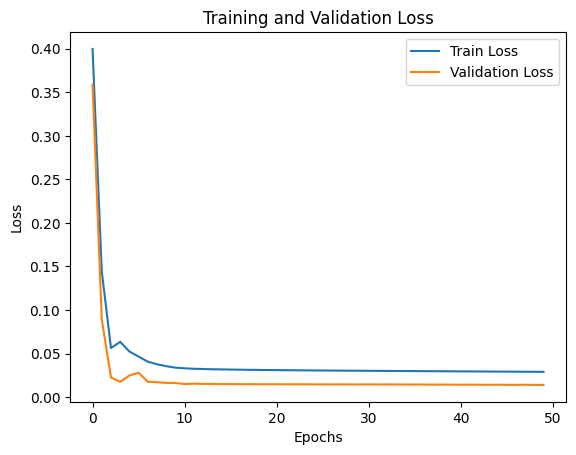

In [16]:
# 高炉模型训练
epoch_once = epoch_once_time
epoch_sum_gaolu = epoch_sum_gaolu + epoch_once
gaolu_train_loss_list,gaolu_val_loss_list = model_gaolu.my_fit(X_gaolu_train, y_gaolu_train,
                                    X_gaolu_val, y_gaolu_val, 
                                    gaolu_train_loss_list, gaolu_val_loss_list,
                                    epochs=epoch_once, 
                                    batch_size=32,
                                    lr = 0.002)

print('\nepoch_sum:',epoch_sum_gaolu)

# 绘制训练和验证损失曲线
plt.plot(gaolu_train_loss_list, label='Train Loss')
plt.plot(gaolu_val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



In [17]:
input_term333_ENGLISH = ['Oxygen Flow', 'Pulverized Coal Injection', 'Hot Blast Pressure', 'Hot Blast Temperature']
output_term333_ENGLISH = ['Hot Metal Temperature', 'Hot Metal Silicon Content']
time_term = 'Timestamp'
print(input_term333_ENGLISH)
print(output_term333_ENGLISH)

['Oxygen Flow', 'Pulverized Coal Injection', 'Hot Blast Pressure', 'Hot Blast Temperature']
['Hot Metal Temperature', 'Hot Metal Silicon Content']


In [18]:
# 用于子图编号的字母序列
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
input_term333 =        ['富氧流量', '设定喷煤量', '热风压力', '热风温度']
output_term333 = ['MIT', '[Si]']
time_term= '时间戳h'
print(input_term333)
print(output_term333)








input_term222 =        ['富氧流量/(m\u00b3/h)', '设定喷煤量/(t/h)', '热风压力/kPa', '热风温度/℃']
output_term222 = ['MIT/℃', '[Si]/%']
time_term= '时间戳h'
print(input_term222)
print(output_term222)


['富氧流量', '设定喷煤量', '热风压力', '热风温度']
['MIT', '[Si]']
['富氧流量/(m³/h)', '设定喷煤量/(t/h)', '热风压力/kPa', '热风温度/℃']
['MIT/℃', '[Si]/%']


In [19]:
ditem = -0.65


英文版

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

def evaluate_model_results(scalers, output_term,
                           y_train, y_train_pred_0, y_train_pred_1,
                           y_test,  y_test_pred_0,  y_test_pred_1):
    """
    使用 scalers 和 output_term 对模型预测结果进行反归一化，
    并计算 RMSE、MAE、MRE、Percent 等指标（训练集与测试集）。
    """

    def inverse_transform(term_idx, data):
        """反归一化指定输出列"""
        return scalers[output_term[term_idx]].inverse_transform(data.reshape(-1, 1)).flatten()

    def calc_metrics(y_true, y_pred, tol):
        """计算 RMSE、MAE、MRE、准确率"""
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = np.mean(np.abs(y_true - y_pred))
        mre = np.mean(np.abs((y_true - y_pred) / y_true))
        percent = np.sum(np.fabs(y_true - y_pred) < tol) / len(y_true)
        return rmse, mae, mre, percent

    # ==============================
    # 🚆 训练集
    # ==============================
    y_train_0 = inverse_transform(0, y_train[:, 0])
    y_train_1 = inverse_transform(1, y_train[:, 1])
    y_train_pred_0_inv = inverse_transform(0, y_train_pred_0)
    y_train_pred_1_inv = inverse_transform(1, y_train_pred_1)

    rmse_0, mae_0, mre_0, pct_0 = calc_metrics(y_train_0, y_train_pred_0_inv, tol=10)
    rmse_1, mae_1, mre_1, pct_1 = calc_metrics(y_train_1, y_train_pred_1_inv, tol=0.1)

    print("\n================= TRAINING SET =================")
    print(f"RMSE   : {output_term[0]} = {rmse_0:.4f} , {output_term[1]} = {rmse_1:.4f}")
    print(f"MAE    : {output_term[0]} = {mae_0:.4f} , {output_term[1]} = {mae_1:.4f}")
    print(f"MRE    : {output_term[0]} = {mre_0:.4f} , {output_term[1]} = {mre_1:.4f}")
    print(f"Within : {output_term[0]} = {pct_0:.4f} , {output_term[1]} = {pct_1:.4f}")

    # ==============================
    # 🧪 测试集
    # ==============================
    y_test_0 = inverse_transform(0, y_test[:, 0])
    y_test_1 = inverse_transform(1, y_test[:, 1])
    y_test_pred_0_inv = inverse_transform(0, y_test_pred_0)
    y_test_pred_1_inv = inverse_transform(1, y_test_pred_1)

    rmse_0, mae_0, mre_0, pct_0 = calc_metrics(y_test_0, y_test_pred_0_inv, tol=10)
    rmse_1, mae_1, mre_1, pct_1 = calc_metrics(y_test_1, y_test_pred_1_inv, tol=0.1)

    print("\n================= TEST SET =================")
    print(f"RMSE   : {output_term[0]} = {rmse_0:.4f} , {output_term[1]} = {rmse_1:.4f}")
    print(f"MAE    : {output_term[0]} = {mae_0:.4f} , {output_term[1]} = {mae_1:.4f}")
    print(f"MRE    : {output_term[0]} = {mre_0:.4f} , {output_term[1]} = {mre_1:.4f}")
    print(f"Within : {output_term[0]} = {pct_0:.4f} , {output_term[1]} = {pct_1:.4f}")


In [21]:

# ================= 子图绘制函数 =================
def plot_subplot(y_true, y_pred, subplot_index, title, ylabel):
    a = 1.0
    b = 1.0
    ditem = -0.65   
    
    ax = plt.subplot(4, 1, subplot_index)

    plt.plot(y_true,  label="True Value",       color='k', linewidth=1.5, alpha=0.8, linestyle='-', marker='o', markersize=1.3)

    plt.plot(y_pred,  label="Predicted Value",  color='r', linewidth=1.5, alpha=0.8, linestyle='-', marker='o', markersize=1.3)

    
    if subplot_index == 1:            
        ax.legend( prop=font_en, loc='upper right', bbox_to_anchor=(1.0, 1.35), ncol=4)
    

    # ---- 辅助线与网格 ----
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
    plt.grid(linestyle='--', alpha=0.3, color='gray')


    # ---- 坐标范围与刻度 ----
    if subplot_index == 1 or subplot_index == 2:
        plt.xlim(0, 281)
        plt.xticks(range(0, 300, 50))
    elif subplot_index == 3 or subplot_index == 4:
        plt.xlim(0, 61)
        plt.xticks(range(0, 61, 15))

    if subplot_index == 1:
        plt.ylim([1430, 1590])
        plt.yticks(range(1430, 1591, 40))
    elif subplot_index == 2:
        plt.ylim([0.10, 1.60])
        plt.yticks([0.10, 0.60, 1.10, 1.60])
    elif subplot_index == 3:
        plt.ylim([1500, 1550])
        plt.yticks(range(1500, 1551, 10))
    elif subplot_index == 4:
        plt.ylim([0.15, 0.6])
        plt.yticks([0.15, 0.30, 0.45, 0.60])
    
    
    plt.ylabel(ylabel, fontproperties=font_en)
    ax.yaxis.set_label_coords(-0.06, 0.5)

    ax.text(0, 1.08, title, transform=ax.transAxes, ha='left', fontproperties=font_en, color='red')

    ax.set_xlabel('Samples', fontproperties=font_en)


In [22]:
def double_control_train_test_result_English(
    scalers, output_term,
    y_test,     y_pred_0,   y_pred_1,
    y_test_2,   y_pred_0_2, y_pred_1_2,
):
    # ================= 第一组数据（建模效果） =================
    # 反归一化预测值与真实值
    y_test_0 = scalers[output_term[0]].inverse_transform(y_test[:, 0].reshape(-1, 1)).flatten()
    y_test_1 = scalers[output_term[1]].inverse_transform(y_test[:, 1].reshape(-1, 1)).flatten()
    y_pred_0_inverse_transform = scalers[output_term[0]].inverse_transform(y_pred_0.reshape(-1, 1)).flatten()
    y_pred_1_inverse_transform = scalers[output_term[1]].inverse_transform(y_pred_1.reshape(-1, 1)).flatten()

    # 计算误差指标
    rmse_0 = np.sqrt(mean_squared_error(y_test_0, y_pred_0_inverse_transform))
    rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_1_inverse_transform))
    mae_0 = np.mean(np.abs(y_test_0 - y_pred_0_inverse_transform))
    mae_1 = np.mean(np.abs(y_test_1 - y_pred_1_inverse_transform))
    mre_0 = np.mean(np.abs((y_test_0 - y_pred_0_inverse_transform) / y_test_0))
    mre_1 = np.mean(np.abs((y_test_1 - y_pred_1_inverse_transform) / y_test_1))
    percent0 = np.sum(np.fabs(y_test_0 - y_pred_0_inverse_transform) < 10) / len(y_test_0)
    percent1 = np.sum(np.fabs(y_test_1 - y_pred_1_inverse_transform) < 0.1) / len(y_test_1)

    # # 打印结果
    # print('训练集（第一组）')
    # print(f"RMSE   :  {output_term[0]}: {rmse_0:.4f} , {output_term[1]}: {rmse_1:.4f}")
    # print(f"MAE    :  {output_term[0]}: {mae_0:.4f} , {output_term[1]}: {mae_1:.4f}")
    # print(f"MRE    :  {output_term[0]}: {mre_0:.4f} , {output_term[1]}: {mre_1:.4f}")
    # print(f"Percent:  {output_term[0]}: {percent0:.4f} , {output_term[1]}: {percent1:.4f}")

    # print('训练集简略结果')
    # print(f"{rmse_0:.4f} {rmse_1:.4f}")
    # print(f"{mae_0:.4f} {mae_1:.4f}")
    # print(f"{mre_0:.4f} {mre_1:.4f}")
    # print(f"{percent0:.4f} {percent1:.4f}")

    # 绘制前两个子图（建模效果）
    plt.figure(figsize=(10, 8))
    plot_subplot(y_test_0, y_pred_0_inverse_transform, 1,
                 f'{subplot_labels[0]} {output_term333[0]} Modeling', output_term222[0])
    plot_subplot(y_test_1, y_pred_1_inverse_transform, 2,
                 f'{subplot_labels[1]} {output_term333[1]} Modeling', output_term222[1])

    # ================= 第二组数据（预测效果） =================
    y_test_0 = scalers[output_term[0]].inverse_transform(y_test_2[:, 0].reshape(-1, 1)).flatten()
    y_test_1 = scalers[output_term[1]].inverse_transform(y_test_2[:, 1].reshape(-1, 1)).flatten()
    y_pred_0_inverse_transform = scalers[output_term[0]].inverse_transform(y_pred_0_2.reshape(-1, 1)).flatten()
    y_pred_1_inverse_transform = scalers[output_term[1]].inverse_transform(y_pred_1_2.reshape(-1, 1)).flatten()

    # 计算误差指标
    rmse_0 = np.sqrt(mean_squared_error(y_test_0, y_pred_0_inverse_transform))
    rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_1_inverse_transform))
    mae_0 = np.mean(np.abs(y_test_0 - y_pred_0_inverse_transform))
    mae_1 = np.mean(np.abs(y_test_1 - y_pred_1_inverse_transform))
    mre_0 = np.mean(np.abs((y_test_0 - y_pred_0_inverse_transform) / y_test_0))
    mre_1 = np.mean(np.abs((y_test_1 - y_pred_1_inverse_transform) / y_test_1))
    percent0 = np.sum(np.fabs(y_test_0 - y_pred_0_inverse_transform) < 10) / len(y_test_0)
    percent1 = np.sum(np.fabs(y_test_1 - y_pred_1_inverse_transform) < 0.1) / len(y_test_1)

    # # 打印结果
    # print('测试集（第二组）')
    # print(f"RMSE   :  {output_term[0]}: {rmse_0:.4f} , {output_term[1]}: {rmse_1:.4f}")
    # print(f"MAE    :  {output_term[0]}: {mae_0:.4f} , {output_term[1]}: {mae_1:.4f}")
    # print(f"MRE    :  {output_term[0]}: {mre_0:.4f} , {output_term[1]}: {mre_1:.4f}")
    # print(f"Percent:  {output_term[0]}: {percent0:.4f} , {output_term[1]}: {percent1:.4f}")

    # print('测试集简略结果')
    # print(f"{rmse_0:.4f} {rmse_1:.4f}")
    # print(f"{mae_0:.4f} {mae_1:.4f}")
    # print(f"{mre_0:.4f} {mre_1:.4f}")
    # print(f"{percent0:.4f} {percent1:.4f}")

    # 绘制后两个子图（预测效果）
    plot_subplot(y_test_0, y_pred_0_inverse_transform, 3,
                 f'{subplot_labels[2]} {output_term333[0]} Prediction', output_term222[0])
    plot_subplot(y_test_1, y_pred_1_inverse_transform, 4,
                 f'{subplot_labels[3]} {output_term333[1]} Prediction', output_term222[1])

    # 调整图像布局
    plt.tight_layout()
    plt.tight_layout()               # 自动优化子图布局


    plt.savefig(
        '1建模和预测.png',   # 保存文件名
        dpi=1200,                # 分辨率（默认100，600已经是印刷级）
        bbox_inches='tight',    # 自动裁剪空白边
        pad_inches=0.05,         # 四周留少量空白
        transparent=False       # 是否透明背景
    )







    plt.show()


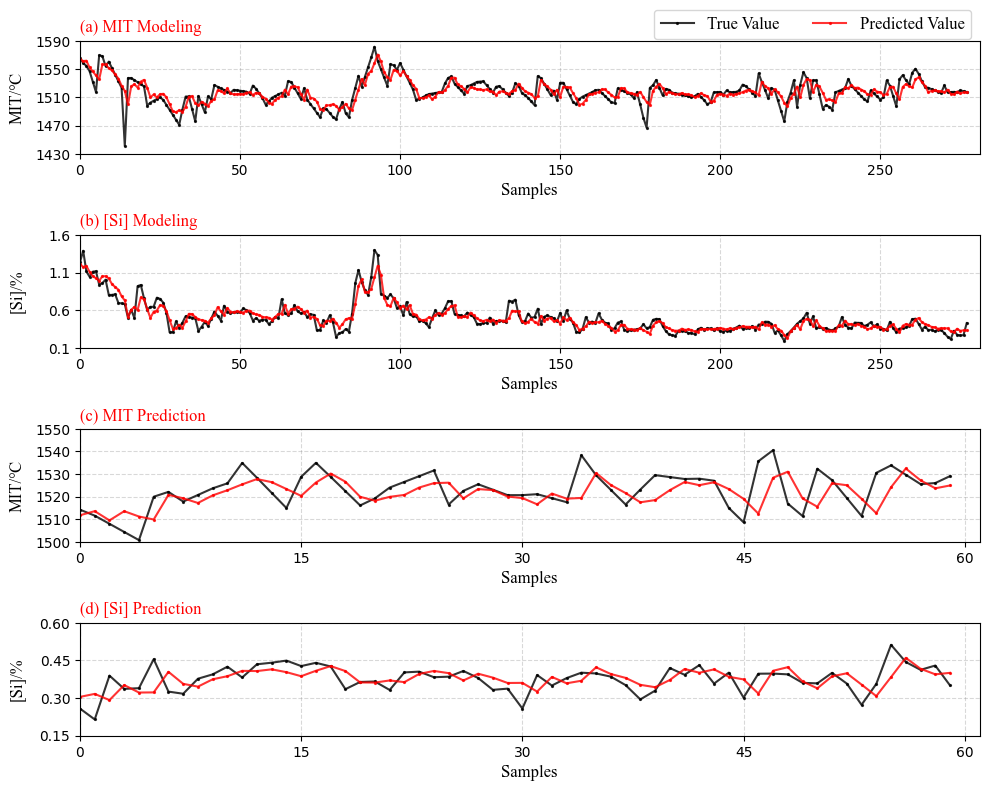

In [23]:
# 高炉模型建模效果

y_train_pred_0,y_train_pred_1 = model_gaolu.my_predict(X_gaolu_train)
y_test_pred_0 ,y_test_pred_1 = model_gaolu.my_predict(X_gaolu_test)



double_control_train_test_result_English(scalers,  output_term,
                                        y_gaolu_train,  y_train_pred_0, y_train_pred_1,
                                        y_gaolu_test ,   y_test_pred_0,  y_test_pred_1,
                                        )
